## CAR PRICE PREDICTION USING DECISION TREE

Use a decision tree regressor model to predict the prices of cars in the Auto_Data_Preped Data set

In [1]:
#import all the necessary libraries

import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
# load the data and preview the column names

auto_prices = pd.read_csv('Auto_Data_Preped.csv')
auto_prices.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'log_price'],
      dtype='object')

In [3]:
auto_prices.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,log_price
0,3,alfa-romero,gas,std,two,hardtop_convert,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,9.510075
1,3,alfa-romero,gas,std,two,hardtop_convert,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,9.711116
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.711116
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.543235
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,9.767095


In [4]:
auto_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   make               195 non-null    object 
 2   fuel_type          195 non-null    object 
 3   aspiration         195 non-null    object 
 4   num_of_doors       195 non-null    object 
 5   body_style         195 non-null    object 
 6   drive_wheels       195 non-null    object 
 7   engine_location    195 non-null    object 
 8   wheel_base         195 non-null    float64
 9   length             195 non-null    float64
 10  width              195 non-null    float64
 11  height             195 non-null    float64
 12  curb_weight        195 non-null    int64  
 13  engine_type        195 non-null    object 
 14  num_of_cylinders   195 non-null    object 
 15  engine_size        195 non-null    int64  
 16  fuel_system        195 non

In [5]:
auto_prices['make'].value_counts()

toyota           32
nissan           18
mitsubishi       13
mazda            13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
alfa-romero       3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

In [6]:
# we will create a dummy variable for the categorical feature body_type using label encoder

print(auto_prices['body_style'].unique())
Features = auto_prices['body_style']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['hardtop_convert' 'hatchback' 'sedan' 'wagon']
[0 0 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 2 2 2 3 1 1 1 1 1 1 2 3 1
 1 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 1 2 2 1 2 2 2 3 0 2 2 0 2 0 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 3 2 1 2 3 0 1 2 2 3 2 1 1 1 2 2 3 3 2 2 3 3 2 2 2
 1 1 1 2 2 3 1 1 0 0 0 1 2 1 2 1 2 1 1 1 2 2 2 2 2 3 3 3 3 1 1 1 3 3 3 2 1
 2 1 2 1 2 2 1 2 1 0 0 1 0 1 0 2 2 1 2 1 1 1 2 3 2 2 2 2 2 2 2 0 1 2 2 3 2
 3 2 3 2 3 2 2 2 2 2]


In [7]:
# we will use one hot encoded to transform the label encoded features

ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()

In [8]:
# we will define a function to convert 5 other numeric columns we deem important

def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['make','fuel_type', 'aspiration', 'drive_wheels', 'num_of_cylinders']

for col in categorical_columns:
    temp = encode_string(auto_prices[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:,2 :])

(195, 35)
[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [9]:
# next we will concatenate 5 numeric features to the features array above to form the full features matrix

Features = np.concatenate([Features, np.array(auto_prices[['engine_size','curb_weight', 'horsepower', 'city_mpg','peak_rpm']])], axis = 1)
Features.shape

(195, 40)

In [10]:
# we will randomly sample the entire set of observations to create independent training and test data
nr.seed(9988)
labels = np.array(auto_prices['price'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [11]:
# we will use standard scaler to rescale the feature matrix

scaler = preprocessing.StandardScaler().fit(x_train[:,35:])
x_train[:,35:] = scaler.transform(x_train[:,35:])
x_test[:,35:] = scaler.transform(x_test[:,35:])
print(x_train.shape)
x_train[:1,:]

(136, 40)


array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.72247402,  0.48873338,  1.07049193, -0.99352988, -0.26092825]])

In [12]:
# we will create an instance of the decision tree model and fit it to training data

from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [13]:
#we predict 
predictions= dt_model.predict(x_test)

In [14]:
#define a function to get evaluation metrics

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
y_score = dt_model.predict(x_test) 
print_metrics(y_test, y_score, 4)

Mean Square Error      = 7779327.694915255
Root Mean Square Error = 2789.1446170672566
Mean Absolute Error    = 1700.949152542373
Median Absolute Error  = 900.0
R^2                    = 0.89033578559564
Adjusted R^2           = 0.8843541011735839


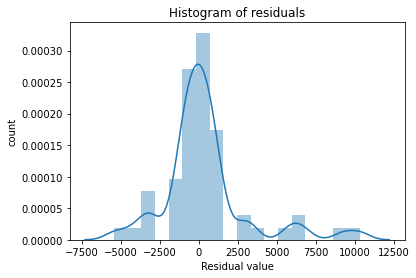

In [15]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

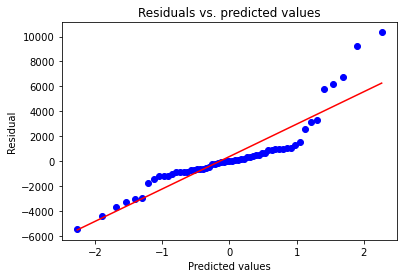

In [16]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score) 

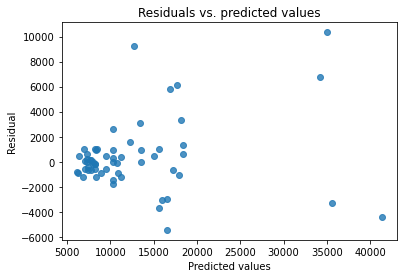

In [17]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

In [18]:
importance= dt_model.feature_importances_

Feature: 0, Score: 0.00042
Feature: 1, Score: 0.00047
Feature: 2, Score: 0.00236
Feature: 3, Score: 0.00024
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00854
Feature: 6, Score: 0.02399
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00033
Feature: 13, Score: 0.00016
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00009
Feature: 16, Score: 0.00040
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00127
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00158
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00318
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.01550
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00008
Feature: 31, Score: 0.00318
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00013
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.68149
Fe

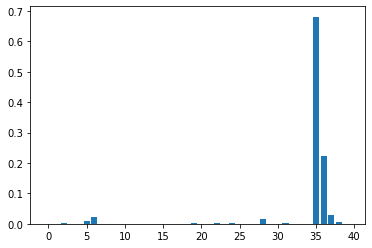

In [19]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()